In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from powerbiclient import QuickVisualize,Report,models
from io import StringIO
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [3]:
# Read the CSV files
ev_makers = pd.read_csv('C:\\Users\\chatt\\Downloads\\datasets\\electric_vehicle_sales_by_makers.csv', encoding='UTF-8-SIG')
ev_states = pd.read_csv('C:\\Users\\chatt\\Downloads\\datasets\\electric_vehicle_sales_by_state.csv', encoding='UTF-8-SIG')
dim_date = pd.read_csv('C:\\Users\\chatt\\Downloads\\datasets\\dim_date.csv', encoding='UTF-8-SIG')

In [4]:
# Read the CSV files
ev_makers = pd.read_csv('electric_vehicle_sales_by_makers.csv', encoding='UTF-8-SIG')
ev_states = pd.read_csv('electric_vehicle_sales_by_state.csv', encoding='UTF-8-SIG')
dim_date = pd.read_csv('dim_date.csv', encoding='UTF-8-SIG')

In [5]:
dim_date.head(2)

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1


In [6]:
ev_states.head(2)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361


In [7]:
ev_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [8]:
ev_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [9]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [10]:
# Convert date to datetime
ev_states['date'] = pd.to_datetime(ev_states['date'], format='%d-%b-%y')
ev_makers['date'] = pd.to_datetime(ev_makers['date'], format='%d-%b-%y')
dim_date['date'] = pd.to_datetime(dim_date['date'], format='%d-%b-%y')


In [11]:
#handling the missing values 
d = [features for features in ev_states.columns if ev_states[features].isnull().sum()>1]
for feature in d:
    print(feature, np.round(ev_states[feature].isnull().mean(), 4), "%missing value")
d

[]

In [12]:
#categorise the numerical data
numerical_feature = [feature for feature in ev_states.columns if ev_states[feature].dtype!='O']
print("Numerical variables", len(numerical_feature))
d = ev_states[numerical_feature]
d

Numerical variables 3


,date,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,0,398
1,2021-04-01,0,361
2,2021-05-01,0,113
3,2021-05-01,0,98
4,2021-06-01,0,229
...,...,...,...
2440,2024-03-01,58,1932
2441,2024-03-01,25,780
2442,2024-03-01,13,1394
2443,2024-03-01,2,447


In [13]:
#Handling the missing values
ev_states[numerical_feature].isnull().sum()

date                      0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [14]:
#categorical variables
discret_feature = [feature for feature in ev_states.columns if ev_states[feature].dtype=='O']
cate = ev_states[discret_feature]
cate

,state,vehicle_category
0,Sikkim,2-Wheelers
1,Sikkim,4-Wheelers
2,Sikkim,2-Wheelers
3,Sikkim,4-Wheelers
4,Sikkim,2-Wheelers
...,...,...
2440,Mizoram,2-Wheelers
2441,DNH and DD,2-Wheelers
2442,Manipur,2-Wheelers
2443,Andaman & Nicobar Island,2-Wheelers


 # Secondary Research Questions

 ### 1. What are the primary reasons for customers choosing 4-wheeler EVs in 2023 and 2024 (cost savings, environmental concerns, government incentives)?


In [15]:
# Filter for 4-Wheelers and the years 2023 and 2024
df_4w = ev_states[(ev_states['vehicle_category'] == '4-Wheelers') & (ev_states['date'].dt.year.isin([2023, 2024]))]

# Group by date and sum the sales
sales_trend = df_4w.groupby('date')['electric_vehicles_sold'].sum().reset_index()

In [16]:
sales_trend.head(2)

,date,electric_vehicles_sold
0,2023-01-01,3438
1,2023-02-01,4756


C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


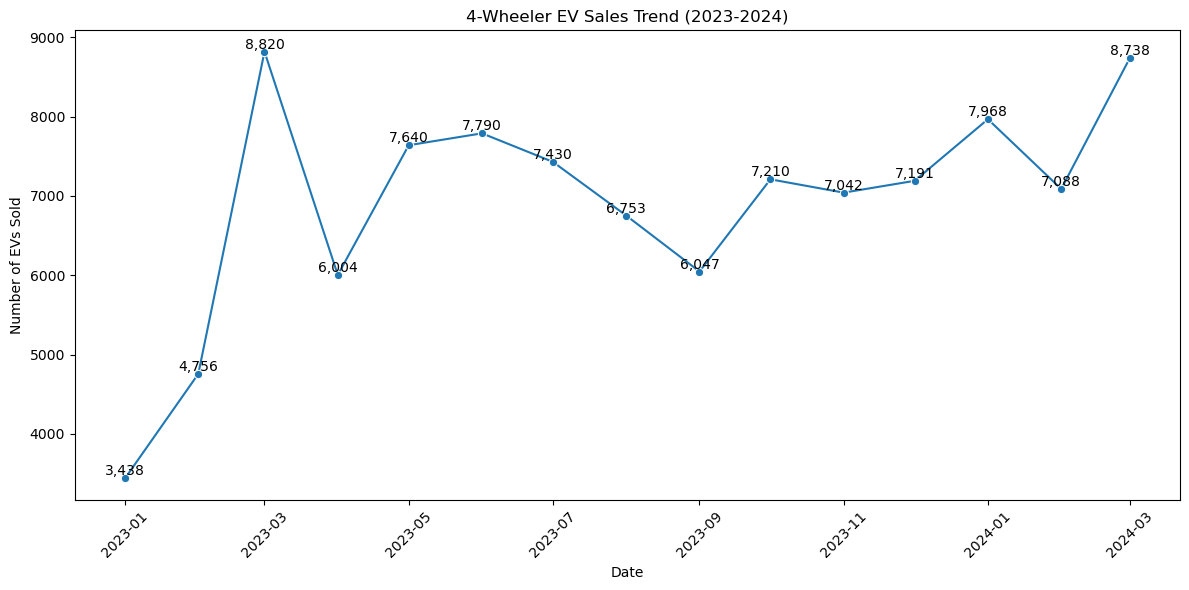

In [18]:

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='electric_vehicles_sold', data=sales_trend, marker='o')

# Annotate the data points with their values
for i in range(len(sales_trend)):
    plt.text(sales_trend['date'].iloc[i], 
             sales_trend['electric_vehicles_sold'].iloc[i], 
             f'{sales_trend["electric_vehicles_sold"].iloc[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('4-Wheeler EV Sales Trend (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Number of EVs Sold')
plt.xticks(rotation=45)
plt.savefig("salestrend.png")
plt.tight_layout()
plt.show()


In [19]:
# Calculate total sales for 2023 and 2024
total_sales_2023 = df_4w[df_4w['date'].dt.year == 2023]['electric_vehicles_sold'].sum()
total_sales_2024 = df_4w[df_4w['date'].dt.year == 2024]['electric_vehicles_sold'].sum()

In [20]:
print(f"Total 4-Wheeler EV sales in 2023: {total_sales_2023}")
print(f"Total 4-Wheeler EV sales in 2024: {total_sales_2024}")

Total 4-Wheeler EV sales in 2023: 80121
Total 4-Wheeler EV sales in 2024: 23794


In [21]:
# Calculate the growth rate
growth_rate = (total_sales_2024 - total_sales_2023) / total_sales_2023 * 100

print(f"Growth rate from 2023 to 2024: {growth_rate:.2f}%")

# Top 5 states with highest 4-Wheeler EV sales in 2023-2024
top_states = df_4w.groupby('state')['electric_vehicles_sold'].sum().sort_values(ascending=False).head(5)

Growth rate from 2023 to 2024: -70.30%


In [22]:
# Top 5 states with highest 4-Wheeler EV sales in 2023-2024
top_states = df_4w.groupby('state')['electric_vehicles_sold'].sum().sort_values(ascending=False).head(5)
print("\
Top 5 states with highest 4-Wheeler EV sales (2023-2024):")
top_states

Top 5 states with highest 4-Wheeler EV sales (2023-2024):


state
Maharashtra    17345
Karnataka      15143
Kerala         11282
Delhi          11015
Gujarat         8238
Name: electric_vehicles_sold, dtype: int64

In [23]:
top_states.index

Index(['Maharashtra', 'Karnataka', 'Kerala', 'Delhi', 'Gujarat'], dtype='object', name='state')

In [23]:
top_states.to_csv("SQ1top_states.csv")

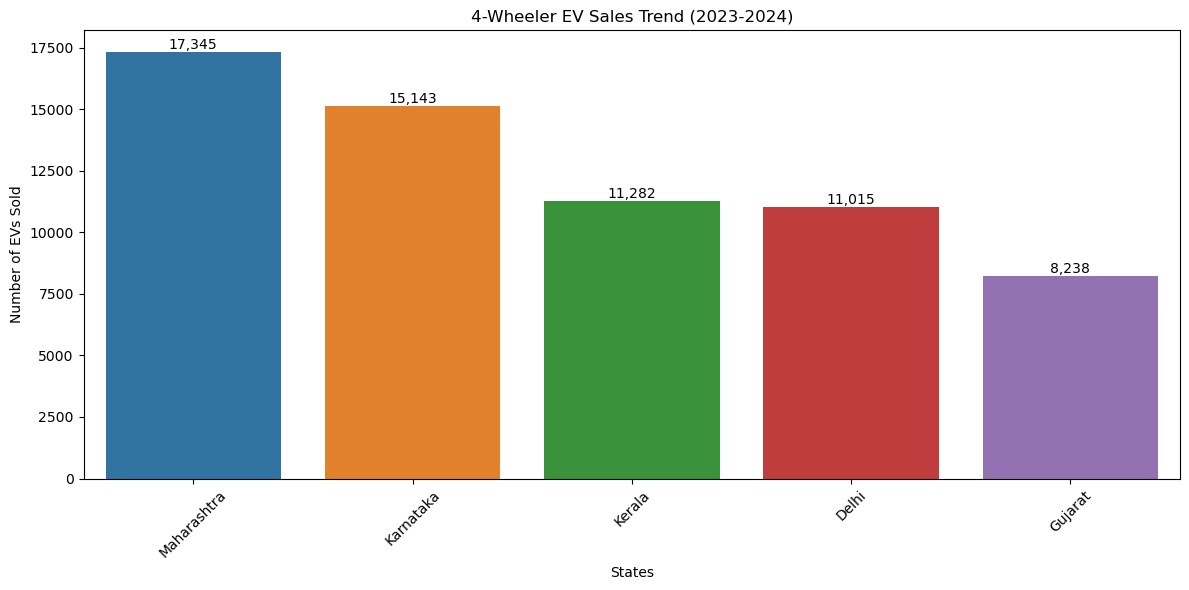

In [26]:
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=top_states.index, y=top_states.values)

# Add text annotations to bars
for i in range(len(top_states)):
    plt.text(i, 
             top_states.iloc[i], 
             f'{top_states.iloc[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('4-Wheeler EV Sales Trend (2023-2024)')
plt.xlabel('States')
plt.ylabel('Number of EVs Sold')
plt.xticks(rotation=45)
plt.savefig("4-Wheeler EV Sales Trend (2023-2024).png")
plt.tight_layout()
plt.show()

 ### 2.How do government incentives and subsidies impact the adoption rates of 2-wheelers and 4-wheelers? Which states in India provided most subsidies? finding insights and visualization

In [27]:
# Group by state and vehicle category, and sum the sales
state_category_sales = ev_states.groupby(['state', 'vehicle_category'])['electric_vehicles_sold'].sum().unstack()

In [28]:
state_category_sales.head(4)

vehicle_category,2-Wheelers,4-Wheelers
state,,
Andaman & Nicobar,2,0
Andaman & Nicobar Island,35,43
Andhra Pradesh,74099,3323
Arunachal Pradesh,4,29


In [29]:
# Calculate total EV sales for each state
state_category_sales['Total_EV'] = state_category_sales['2-Wheelers'] + state_category_sales['4-Wheelers']

In [30]:
state_category_sales.head(5)

vehicle_category,2-Wheelers,4-Wheelers,Total_EV
state,,,
Andaman & Nicobar,2,0,2
Andaman & Nicobar Island,35,43,78
Andhra Pradesh,74099,3323,77422
Arunachal Pradesh,4,29,33
Assam,5963,455,6418


In [31]:
# Sort by total EV sales
top_10_states = state_category_sales.sort_values('Total_EV', ascending=False).head(10)

In [32]:
#top_10_states.to_csv("SQ2top_10_states.csv")

In [33]:
#top_10_states.to_csv("SQ2top_10_statess.csv")

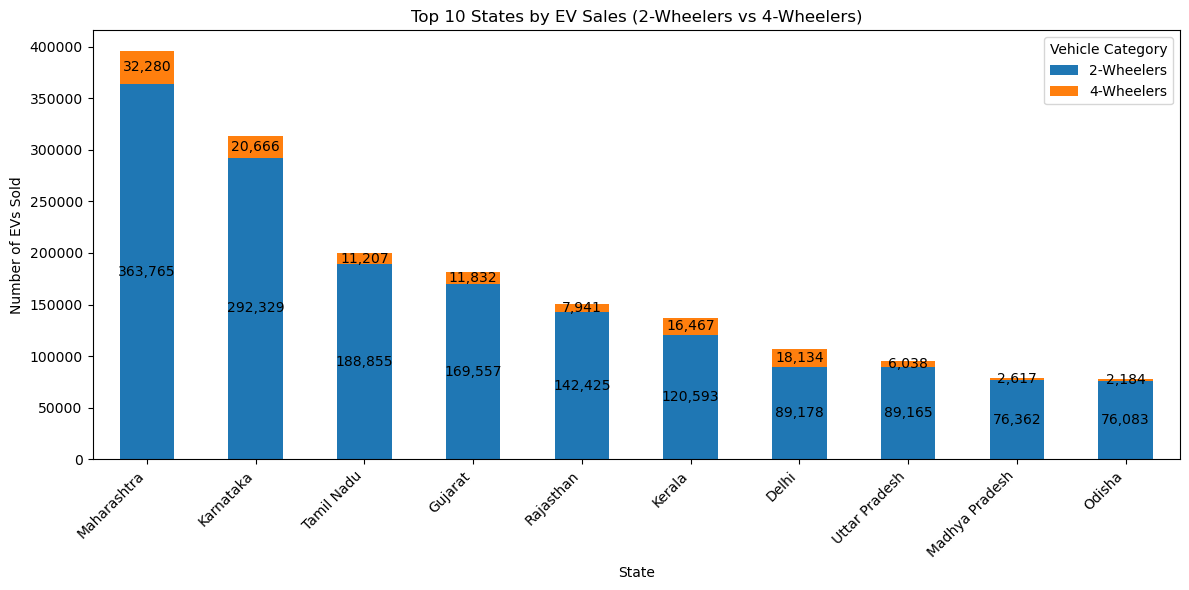

In [36]:

plt.figure(figsize=(12, 6))

# Create stacked bar plot
ax = top_10_states[['2-Wheelers', '4-Wheelers']].plot(kind='bar', stacked=True, ax=plt.gca())

# Add numeric annotations to each segment
for i in range(top_10_states.shape[0]):  # Loop through each bar
    two_wheelers = top_10_states['2-Wheelers'].iloc[i]
    four_wheelers = top_10_states['4-Wheelers'].iloc[i]
    
    # Add annotations for 2-Wheelers
    plt.text(i, two_wheelers / 2, f'{two_wheelers:,}', ha='center', va='center')
    
    # Add annotations for 4-Wheelers (stacked on top of 2-Wheelers)
    plt.text(i, two_wheelers + four_wheelers / 2, f'{four_wheelers:,}', ha='center', va='center')

# Add labels and title
plt.title('Top 10 States by EV Sales (2-Wheelers vs 4-Wheelers)')
plt.xlabel('State')
plt.ylabel('Number of EVs Sold')
plt.legend(title='Vehicle Category')
plt.xticks(rotation=45, ha='right')
plt.savefig("Top 10 States by EV Sales (2-Wheelers vs 4-Wheelers).png")
plt.tight_layout()
plt.show()

In [35]:
print("Top 10 states by total EV sales:")

Top 10 states by total EV sales:


In [37]:
top_10_states[['2-Wheelers', '4-Wheelers', 'Total_EV']]

vehicle_category,2-Wheelers,4-Wheelers,Total_EV
state,,,
Maharashtra,363765,32280,396045
Karnataka,292329,20666,312995
Tamil Nadu,188855,11207,200062
Gujarat,169557,11832,181389
Rajasthan,142425,7941,150366
Kerala,120593,16467,137060
Delhi,89178,18134,107312
Uttar Pradesh,89165,6038,95203
Madhya Pradesh,76362,2617,78979


In [38]:
# Calculate the ratio of 2-wheelers to 4-wheelers
top_10_states['2W_to_4W_ratio'] = round(top_10_states['2-Wheelers'] / top_10_states['4-Wheelers'],3)


In [39]:
top_10_states

vehicle_category,2-Wheelers,4-Wheelers,Total_EV,2W_to_4W_ratio
state,,,,
Maharashtra,363765,32280,396045,11.269
Karnataka,292329,20666,312995,14.145
Tamil Nadu,188855,11207,200062,16.852
Gujarat,169557,11832,181389,14.330
Rajasthan,142425,7941,150366,17.935
Kerala,120593,16467,137060,7.323
Delhi,89178,18134,107312,4.918
Uttar Pradesh,89165,6038,95203,14.767
Madhya Pradesh,76362,2617,78979,29.179


In [40]:
top_10_states['2W_to_4W_ratio'].sort_values(ascending=False)

state
Odisha            34.837
Madhya Pradesh    29.179
Rajasthan         17.935
Tamil Nadu        16.852
Uttar Pradesh     14.767
Gujarat           14.330
Karnataka         14.145
Maharashtra       11.269
Kerala             7.323
Delhi              4.918
Name: 2W_to_4W_ratio, dtype: float64

In [41]:
# Analyze monthly trends for top 5 states
top_5_states = top_10_states.index[:5]

In [42]:
top_5_states

Index(['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Gujarat', 'Rajasthan'], dtype='object', name='state')

In [43]:
monthly_sales = ev_states[ev_states['state'].isin(top_5_states)].groupby(['date', 'state', 'vehicle_category'])['electric_vehicles_sold'].sum().unstack(level=[1,2])
monthly_sales.columns = monthly_sales.columns.map('_'.join)

In [44]:
monthly_sales.head(5)

,Gujarat_2-Wheelers,Gujarat_4-Wheelers,Karnataka_2-Wheelers,Karnataka_4-Wheelers,Maharashtra_2-Wheelers,Maharashtra_4-Wheelers,Rajasthan_2-Wheelers,Rajasthan_4-Wheelers,Tamil Nadu_2-Wheelers,Tamil Nadu_4-Wheelers
date,,,,,,,,,,
2021-04-01,98,44,1549,90,428,96,325,22,1297,75
2021-05-01,106,29,140,2,189,121,33,7,237,14
2021-06-01,207,61,560,71,891,190,515,34,660,42
2021-07-01,358,53,3384,196,2101,286,1378,52,2801,88
2021-08-01,584,83,3319,137,2419,197,1451,53,2745,88


In [47]:
#monthly_sales.to_csv("SQ2monthly_sales.csv")

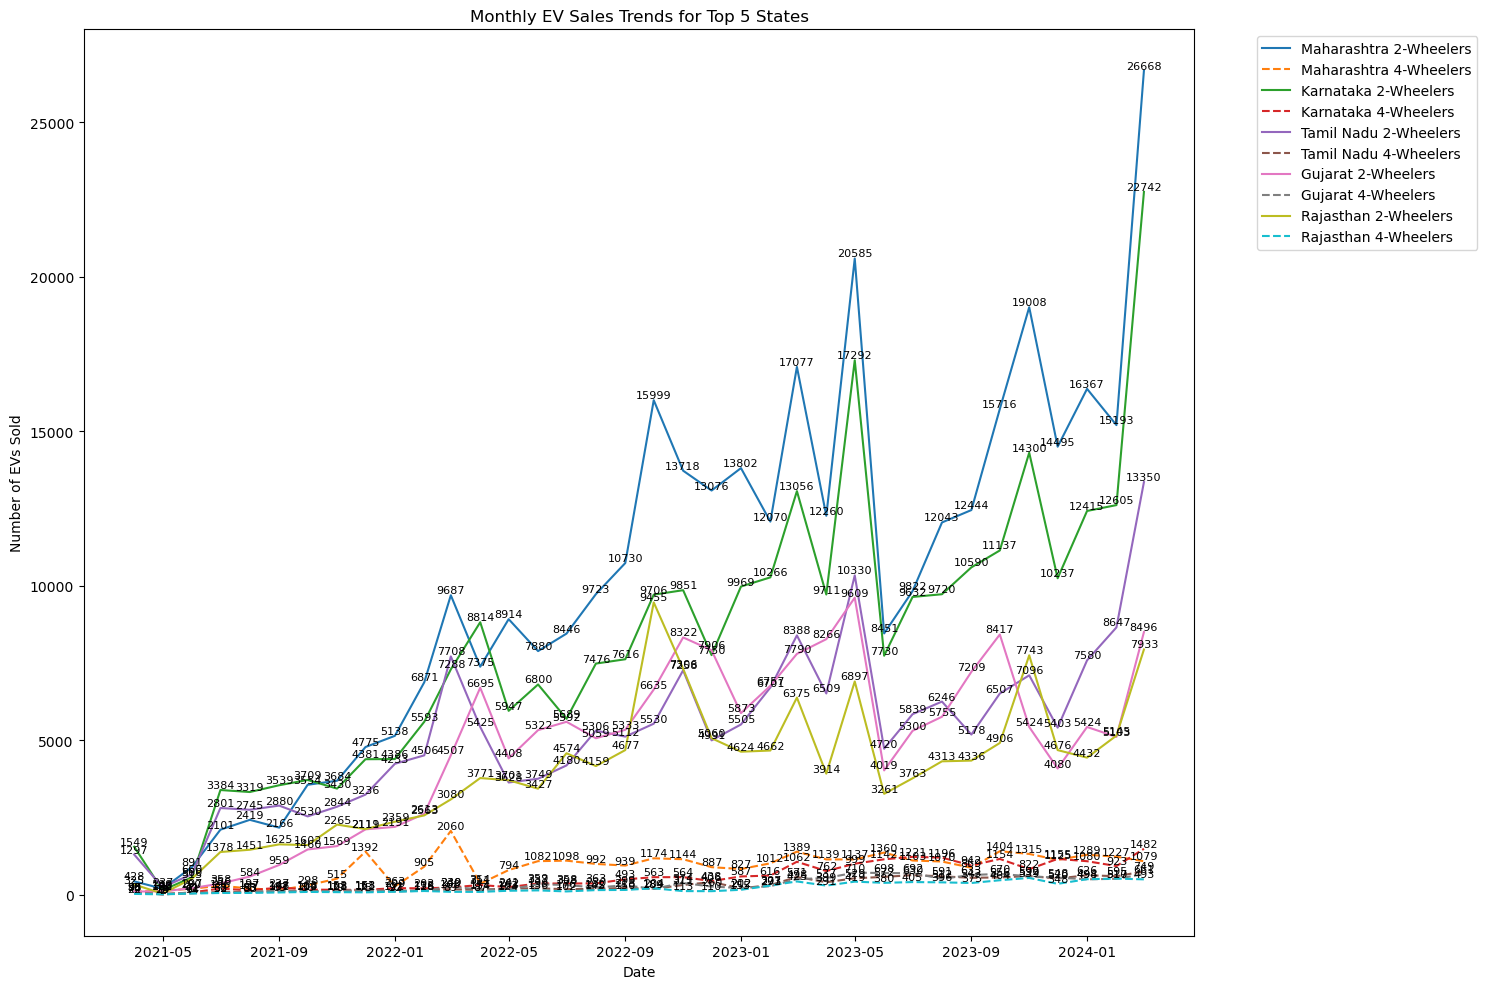

In [48]:
plt.figure(figsize=(15, 10))

for state in top_5_states:
    # Plot 2-Wheelers
    plt.plot(monthly_sales.index, monthly_sales[f'{state}_2-Wheelers'], label=f'{state} 2-Wheelers')
    for x, y in zip(monthly_sales.index, monthly_sales[f'{state}_2-Wheelers']):
        plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=8)

    # Plot 4-Wheelers
    plt.plot(monthly_sales.index, monthly_sales[f'{state}_4-Wheelers'], label=f'{state} 4-Wheelers', linestyle='--')
    for x, y in zip(monthly_sales.index, monthly_sales[f'{state}_4-Wheelers']):
        plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=8)

plt.title('Monthly EV Sales Trends for Top 5 States')
plt.xlabel('Date')
plt.ylabel('Number of EVs Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Monthly EV Sales Trends for Top 5 States.png')
plt.show()

 ### 3. How does the availability of charging stations infrastructure correlate with the EV sales and penetration rates in the top 5 states?

In [49]:
# Calculate total EV sales and total vehicle sales by state
state_sales = ev_states.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

In [50]:
state_sales.head(3)

,state,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,2,660
1,Andaman & Nicobar Island,78,18225
2,Andhra Pradesh,77422,2283871


In [51]:
# Calculate EV penetration rate
state_sales['ev_penetration_rate'] = state_sales['electric_vehicles_sold'] / state_sales['total_vehicles_sold'] * 100

# Sort by EV sales and get top 5 states
top_5_states = state_sales.sort_values('electric_vehicles_sold', ascending=False).head(5)

print("Top 5 states by EV sales:")
top_5_states

Top 5 states by EV sales:


,state,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
20,Maharashtra,396045,6101429,6.491020
16,Karnataka,312995,3994329,7.835984
30,Tamil Nadu,200062,4652363,4.300223
11,Gujarat,181389,4125551,4.396722
28,Rajasthan,150366,3307591,4.546088


In [52]:
top_5_states.to_csv("SQ3top_5_states.csv")

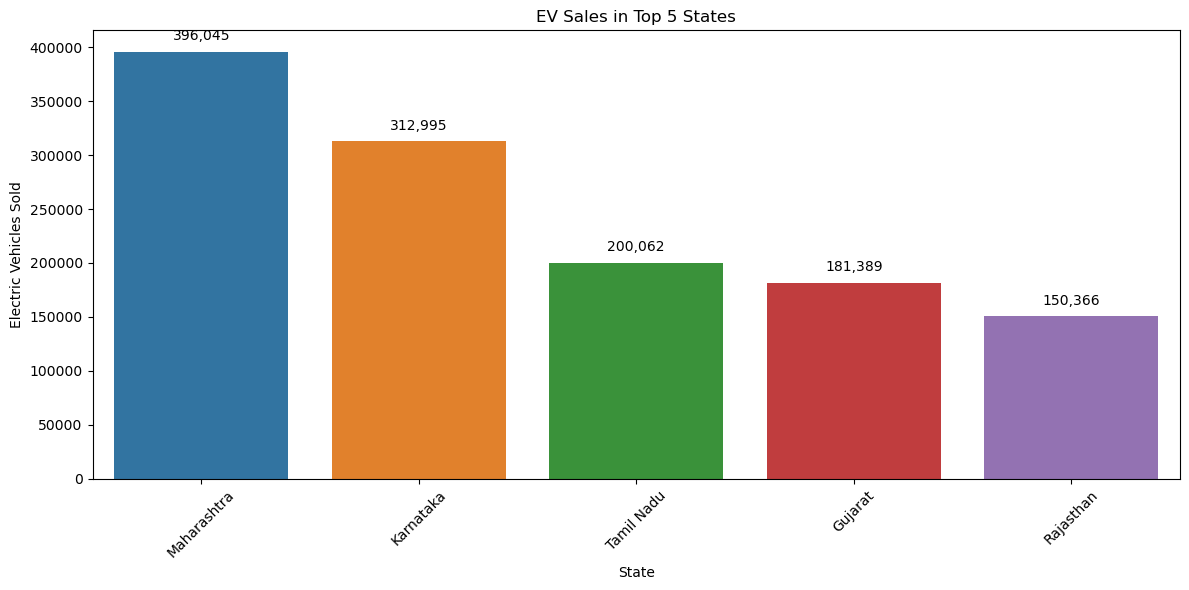

In [81]:

plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x='state', y='electric_vehicles_sold', data=top_5_states)

# Add numerical annotations on top of each bar
for i in range(len(top_5_states)):
    plt.text(i, 
             top_5_states['electric_vehicles_sold'].iloc[i] + 0.02 * max(top_5_states['electric_vehicles_sold']), 
             f'{top_5_states["electric_vehicles_sold"].iloc[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('EV Sales in Top 5 States')
plt.xlabel('State')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45)
plt.savefig("EV Sales in Top 5 States.png")
plt.tight_layout()
plt.show()

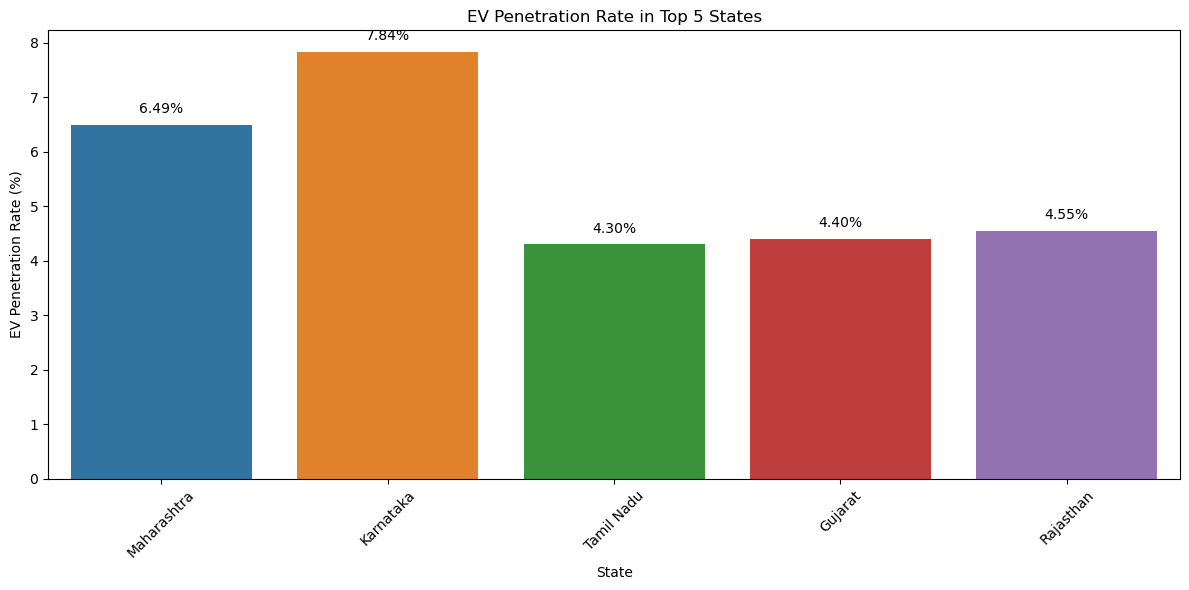

In [53]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x='state', y='ev_penetration_rate', data=top_5_states)

# Add numerical annotations on top of each bar
for i in range(len(top_5_states)):
    plt.text(i, 
             top_5_states['ev_penetration_rate'].iloc[i] + 0.02 * max(top_5_states['ev_penetration_rate']), 
             f'{top_5_states["ev_penetration_rate"].iloc[i]:.2f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.title('EV Penetration Rate in Top 5 States')
plt.xlabel('State')
plt.ylabel('EV Penetration Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("EV Penetration Rate in Top 5 States.png")
plt.show()

###  4.Who should be the brand ambassador if AtliQ Motors launches their EV/Hybrid vehicles in India and why?

In [54]:
ev_makers['date'] = pd.to_datetime(ev_makers['date'], format='%d-%b-%y')

In [55]:
ev_makers

,date,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0
1,2022-04-01,2-Wheelers,OKAYA EV,0
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0
...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2-Wheelers,REVOLT,585


In [56]:
# Group by maker and calculate total sales
maker_sales = ev_makers.groupby('maker')['electric_vehicles_sold'].sum().sort_values(ascending=False)

# Get top 10 makers
top_10_makers = maker_sales.head(10)

In [57]:
top_10_makers

maker
OLA ELECTRIC           489473
TVS                    272575
ATHER                  204449
HERO ELECTRIC          170394
AMPERE                 167274
OKINAWA                165231
OTHERS                 156471
BAJAJ                  145606
Tata Motors             88935
Mahindra & Mahindra     41193
Name: electric_vehicles_sold, dtype: int64

In [58]:
# top_10_makers.to_csv("SQ4top_10_makers.csv")

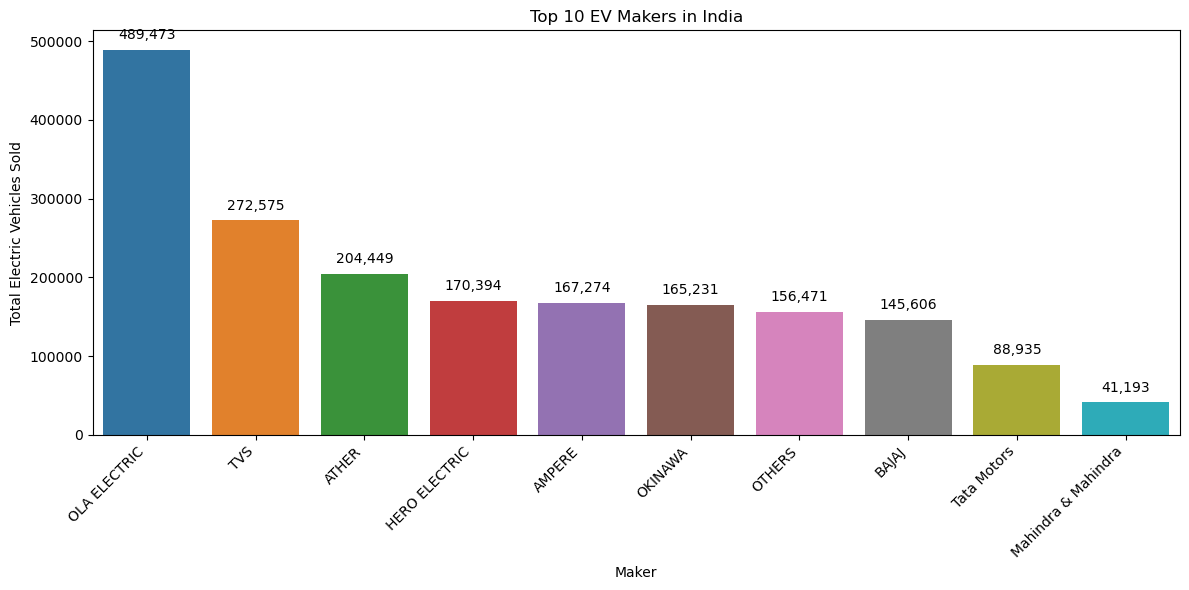

In [59]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=top_10_makers.index, y=top_10_makers.values)

# Add numerical values on top of each bar
for i in range(len(top_10_makers)):
    plt.text(i, 
             top_10_makers.values[i] + 0.02 * max(top_10_makers.values), 
             f'{top_10_makers.values[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('Top 10 EV Makers in India')
plt.xlabel('Maker')
plt.ylabel('Total Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Top 10 EV Makers in India.png")
plt.show()

In [61]:
# Calculate market share for top 5 makers
top_5_makers = maker_sales.head(5)
total_sales = maker_sales.sum()
market_share = (top_5_makers / total_sales * 100).round(2)
market_share.to_csv("SQ4market_share.csv")

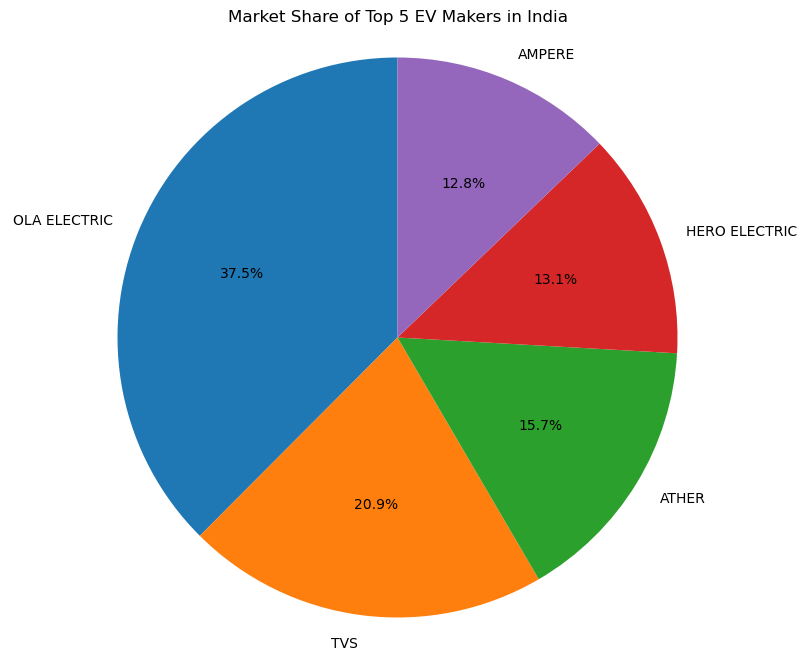

In [62]:
plt.figure(figsize=(10, 8))

# Create the pie chart
plt.pie(market_share, 
        labels=market_share.index, 
        autopct='%1.1f%%', 
        startangle=90)

# Add title and make the pie chart circular
plt.title('Market Share of Top 5 EV Makers in India')
plt.axis('equal')

# Display the chart
plt.savefig("Market Share of Top 5 EV Makers in India.png")
plt.show()

 ### 5.Which state of India is ideal to start the manufacturing unit? (Based on subsidies provided, ease of doing business, stability in governance etc.) insights and visualization

In [63]:
# Group by state and calculate total EV sales
state_saless = ev_states.groupby('state')['electric_vehicles_sold'].sum().sort_values(ascending=False)


In [64]:
state_saless

state
Maharashtra                 396045
Karnataka                   312995
Tamil Nadu                  200062
Gujarat                     181389
Rajasthan                   150366
Kerala                      137060
Delhi                       107312
Uttar Pradesh                95203
Madhya Pradesh               78979
Odisha                       78267
Andhra Pradesh               77422
Chhattisgarh                 53804
Bihar                        31019
Haryana                      30797
West Bengal                  30560
Punjab                       23833
Goa                          19684
Jharkhand                    18461
Uttarakhand                  15127
Assam                         6418
Jammu and Kashmir             5971
Puducherry                    5536
Chandigarh                    5279
Himachal Pradesh              2595
Tripura                        562
DNH and DD                     355
Mizoram                        340
Manipur                        299
Meghalaya     

In [65]:
top_10_sales = state_saless.head(10)

In [66]:
top_10_sales

state
Maharashtra       396045
Karnataka         312995
Tamil Nadu        200062
Gujarat           181389
Rajasthan         150366
Kerala            137060
Delhi             107312
Uttar Pradesh      95203
Madhya Pradesh     78979
Odisha             78267
Name: electric_vehicles_sold, dtype: int64

In [67]:
# Calculate EV penetration rate
state_total_sales = ev_states.groupby('state')['total_vehicles_sold'].sum()
ev_penetration = (state_saless / state_total_sales * 100).sort_values(ascending=False)

In [68]:
top_10_penetration = ev_penetration.head(10)
#top_10_penetration.to_csv("SQ5top_10_penetration.csv")

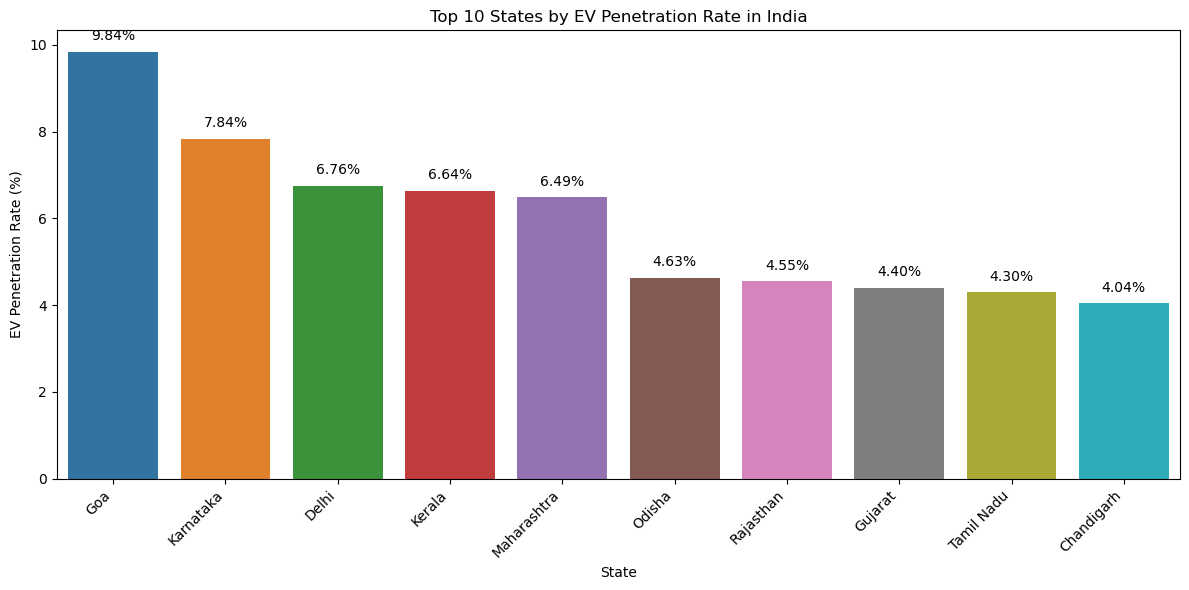

In [69]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=top_10_penetration.index, y=top_10_penetration.values)

# Add numerical values on top of each bar
for i in range(len(top_10_penetration)):
    plt.text(i, 
             top_10_penetration.values[i] + 0.02 * max(top_10_penetration.values), 
             f'{top_10_penetration.values[i]:.2f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.title('Top 10 States by EV Penetration Rate in India')
plt.xlabel('State')
plt.ylabel('EV Penetration Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_10_states_ev_penetration.png')

# Show the plot
plt.show()

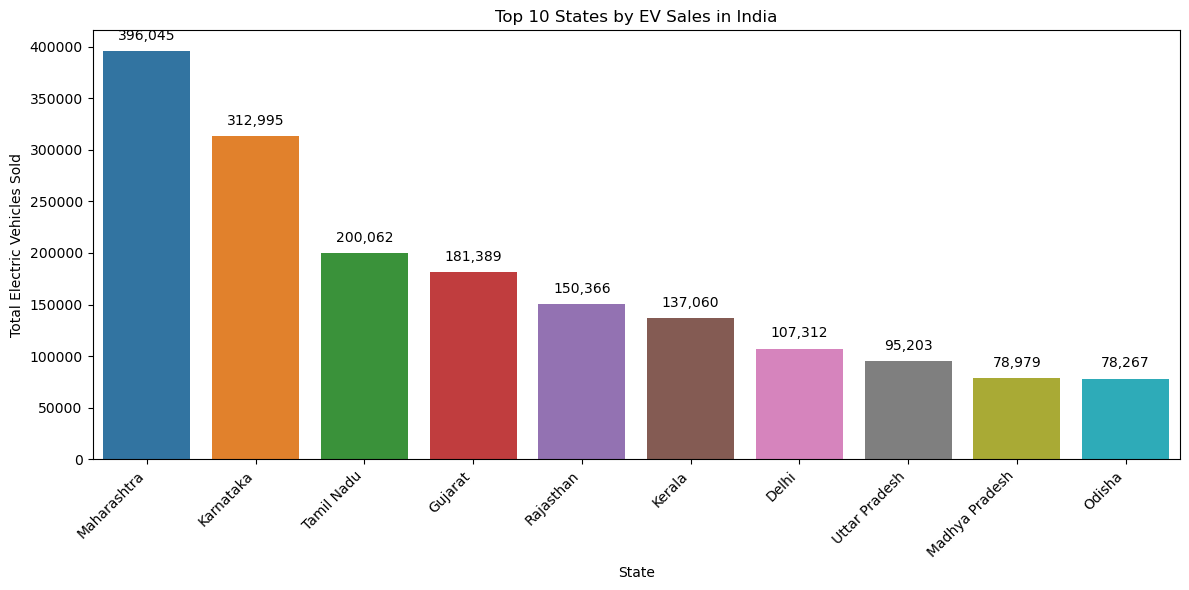

In [60]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=top_10_sales.index, y=top_10_sales.values)

# Add numerical values on top of each bar
for i in range(len(top_10_sales)):
    plt.text(i, 
             top_10_sales.values[i] + 0.02 * max(top_10_sales.values), 
             f'{top_10_sales.values[i]:,}', 
             ha='center', va='bottom')

# Add labels and title
plt.title('Top 10 States by EV Sales in India')
plt.xlabel('State')
plt.ylabel('Total Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

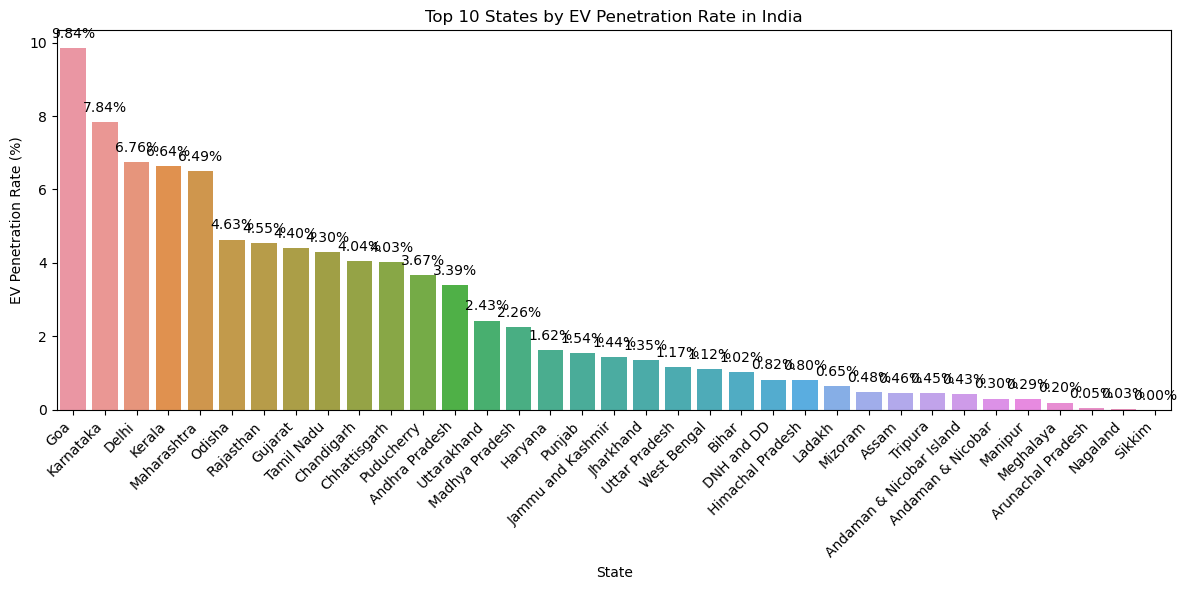

In [61]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=ev_penetration.index, y=ev_penetration.values)

# Add numerical values on top of each bar
for i in range(len(ev_penetration)):
    plt.text(i, 
             ev_penetration.values[i] + 0.02 * max(ev_penetration.values), 
             f'{ev_penetration.values[i]:.2f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.title('Top 10 States by EV Penetration Rate in India')
plt.xlabel('State')
plt.ylabel('EV Penetration Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
#plt.savefig('top_10_states_ev_penetration.png')

# Show the plot
plt.show()

### 6. Your top 3 recommendations for AtliQ Motors.

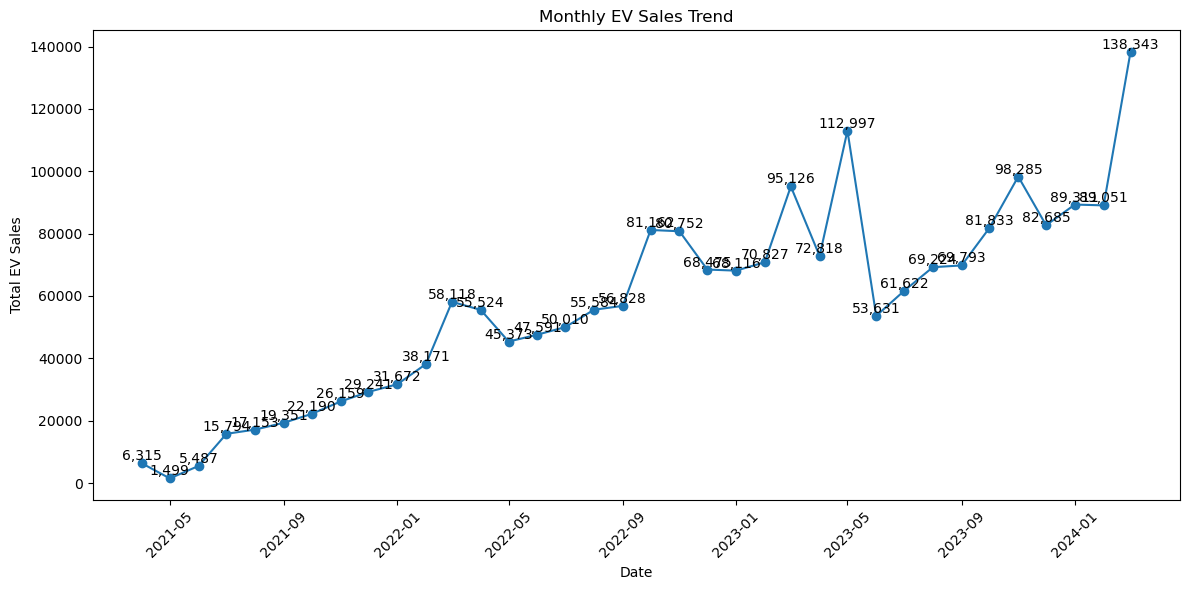

In [110]:


# Grouping by month and summing the electric vehicle sales
monthly_sales = ev_states.groupby(ev_states['date'].dt.to_period('M'))['electric_vehicles_sold'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['electric_vehicles_sold'], marker='o')

# Annotating the data points
for i in range(len(monthly_sales)):
    plt.text(monthly_sales['date'][i], 
             monthly_sales['electric_vehicles_sold'][i], 
             f'{monthly_sales["electric_vehicles_sold"][i]:,}', 
             ha='center', va='bottom')

# Adding labels and title
plt.title('Monthly EV Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Saving and showing the plot
#plt.savefig('monthly_ev_sales_trend.png')
plt.show()


In [111]:
monthly_sales.to_csv("SQ6monthly_sales.csv")

In [70]:
# Group by state and calculate total EV sales
state_sales = ev_states.groupby('state')['electric_vehicles_sold'].sum().sort_values(ascending=False)



# Calculate EV penetration rate
state_total_sales = ev_states.groupby('state')['total_vehicles_sold'].sum()
ev_penetration = (state_sales / state_total_sales * 100).sort_values(ascending=False)

In [71]:
# Get top 10 states
top_10_states = state_sales.head(10)
top_10_states

state
Maharashtra       396045
Karnataka         312995
Tamil Nadu        200062
Gujarat           181389
Rajasthan         150366
Kerala            137060
Delhi             107312
Uttar Pradesh      95203
Madhya Pradesh     78979
Odisha             78267
Name: electric_vehicles_sold, dtype: int64

In [72]:
top_10_states.to_csv("SQ6top_10_states.csv")

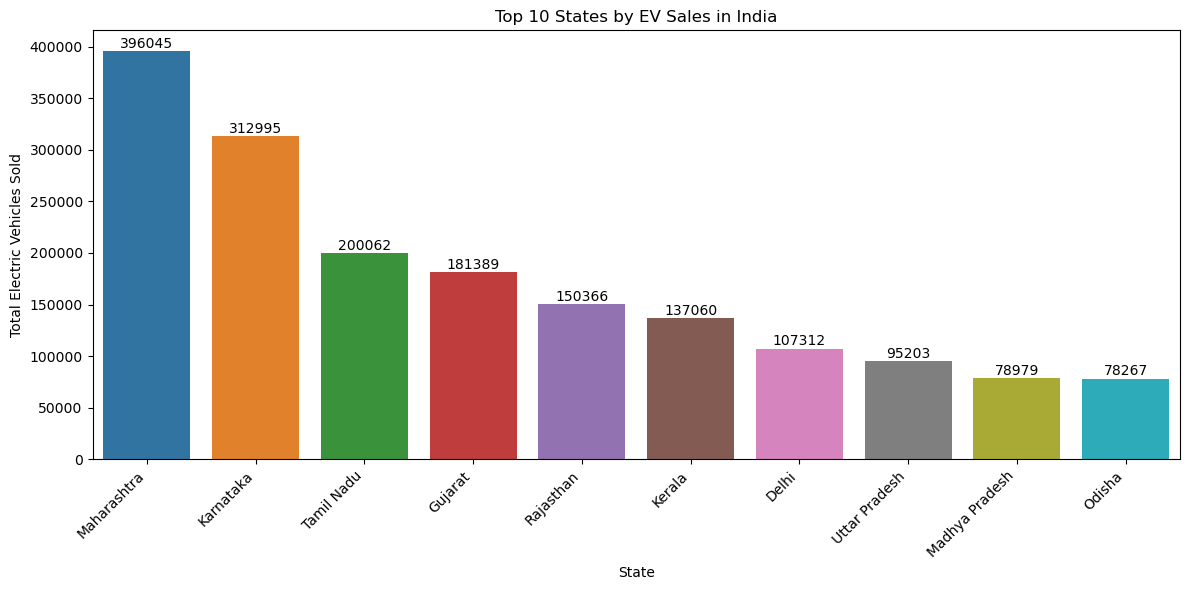

In [75]:

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values)

# Adding values on top of the bars
for i, value in enumerate(top_10_states.values):
    plt.text(i, value + 200, str(value), ha='center', va='bottom')

plt.title('Top 10 States by EV Sales in India')
plt.xlabel('State')
plt.ylabel('Total Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_states_ev_sales.png')
plt.show()

In [77]:
print("\
Visualizations saved as 'top_10_states_ev_sales.png' and 'top_10_states_ev_penetration.png'")

# Additional data (for illustration purposes)
ease_of_doing_business = {
    'Maharashtra': 85,
    'Karnataka': 88,
    'Tamil Nadu': 82,
    'Uttar Pradesh': 83,
    'Gujarat': 90,
    'Delhi': 80,
    'Rajasthan': 75,
    'Haryana': 82,
    'Telangana': 85,
    'Madhya Pradesh': 79
}

# Create a DataFrame with combined data
combined_data = pd.DataFrame({
    'EV Sales': top_10_states,
    'EV Penetration': ev_penetration,
    'Ease of Doing Business': pd.Series(ease_of_doing_business)
})

# Sort by a combined score (you can adjust weights as needed)
combined_data['Combined Score'] = (
    combined_data['EV Sales'].rank(ascending=True) +
    combined_data['EV Penetration'].rank(ascending=True) +
    combined_data['Ease of Doing Business'].rank(ascending=True)
)

combined_data = combined_data.sort_values('Combined Score', ascending=False)

Visualizations saved as 'top_10_states_ev_sales.png' and 'top_10_states_ev_penetration.png'


In [121]:
combined_data.to_csv("SQ6combined_data.csv")

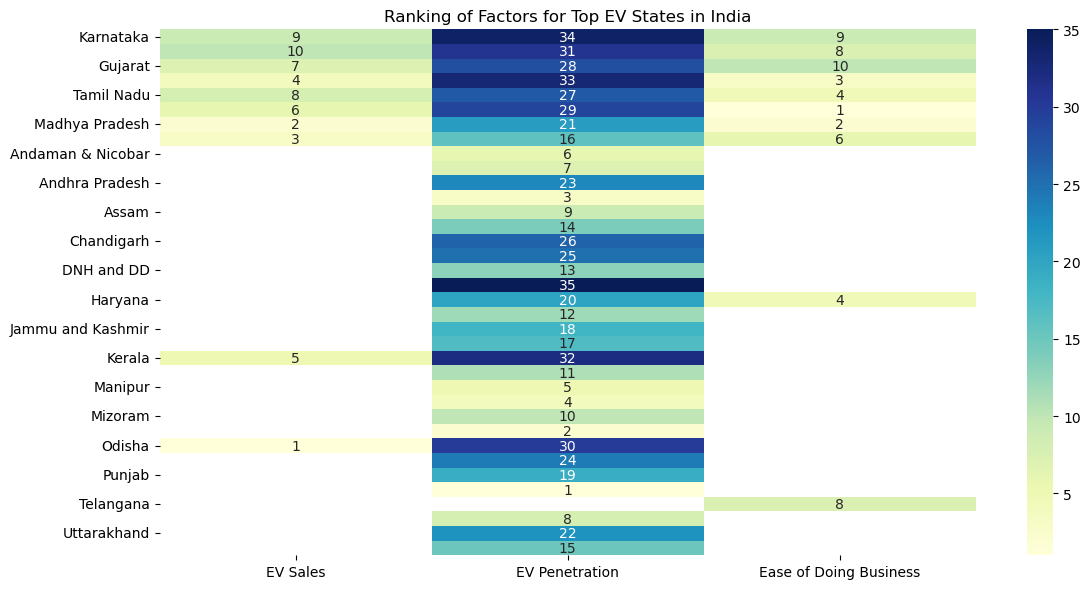

Heatmap visualization saved as 'combined_factors_heatmap.png'


In [80]:
# Visualize the combined data
plt.figure(figsize=(12, 6))
sns.heatmap(combined_data[['EV Sales', 'EV Penetration', 'Ease of Doing Business']].rank(ascending=True), 
            annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Ranking of Factors for Top EV States in India')
plt.tight_layout()
plt.savefig('combined_factors_heatmap.png')
plt.show()

print("\
Heatmap visualization saved as 'combined_factors_heatmap.png'")

In [64]:
top_10_states

state
Maharashtra       396045
Karnataka         312995
Tamil Nadu        200062
Gujarat           181389
Rajasthan         150366
Kerala            137060
Delhi             107312
Uttar Pradesh      95203
Madhya Pradesh     78979
Odisha             78267
Name: electric_vehicles_sold, dtype: int64